# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
def link(path):
    
    df = pd.read_csv(path)
    
    return df

In [6]:
path = "Temp_States.csv"


temp = link(path)


#### Print `temp`

In [122]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [15]:
temp.dtypes

# The temperature has float values (decimales) and the other two columns have object types, in this case being strings

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [32]:
temp[temp.State.isin(["New York"])]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


In [30]:
temp[temp.State == "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [46]:
#Redondear?

In [45]:
temp[temp.State == "New York"].Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [70]:
# your answer here
temp[["City", "State"]][temp.Temperature > 15]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [73]:
temp[["City"]][temp.Temperature > 15]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [79]:
temp[["City"]][(15 < temp.Temperature) & (temp.Temperature <20)]

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [102]:
ejer = temp.groupby('State')

ejer = (ejer.mean(), ejer.std())

ejer

(             Temperature
 State                   
 Connecticut    15.833333
 New Jersey     21.111111
 New York       10.740741,
              Temperature
 State                   
 Connecticut     1.964186
 New Jersey      1.571348
 New York        8.133404)

In [113]:
result = temp.groupby(['State']).agg(
                      {'Temperature':['mean','std']})

In [114]:
result

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [8]:
path = "Employee.csv"

employee = link(path)

#### Explore the data types of the Temp dataframe. Comment your results

In [137]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [127]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [131]:
import matplotlib.pyplot as lt

In [174]:
#He intentado ahce subplots pero me dice que matplotlib no tiene esa función
#Podemos ver que la mayor parte de los empleados son hombres. 
#La mayoría de los empleados tienen un master
#La mayor parte trabaja en IT

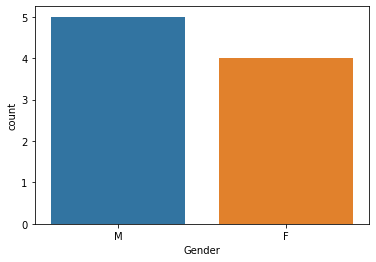

In [172]:
sns.countplot(employee['Gender'])

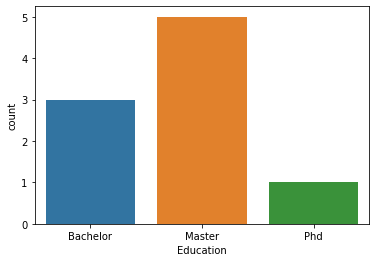

In [171]:
sns.countplot(employee['Education'])

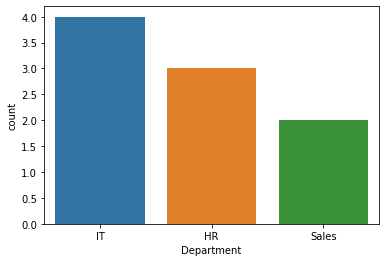

In [170]:
sns.countplot(employee['Department'])

In [175]:
#Los salarios se encuentran entre os 30 y 70 mil EUR
#La mayoría de los empleados llevan entre 1 y 2 años o entre 7 y 8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022216D5F970>]],
      dtype=object)

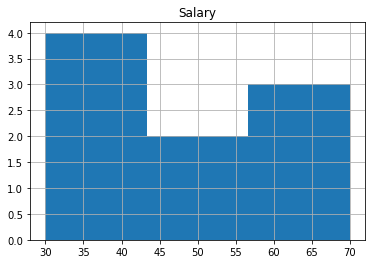

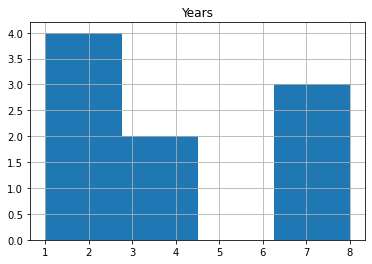

In [168]:
employee.hist('Salary', bins=3)
employee.hist('Years', bins= 4)

#### What's the average salary in this company?

In [176]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [180]:
max_salary = employee.Salary.max()

In [181]:
max_salary

70

#### What's the lowest salary?

In [179]:
# your answer here
min_salary = employee.Salary.min()

In [182]:
min_salary

30

#### Who are the employees with the lowest salary?

In [184]:
#Los trabajadores con el menor salario son dos analistas, Maria y David

In [183]:
employee[["Name", "Gender", "Title"]][employee.Salary == min_salary ]

,Name,Gender,Title
1,Maria,F,analyst
2,David,M,analyst


#### Could you give all the information about an employee called David?

In [185]:
employee[employee.Name == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [186]:
employee[["Salary"]][employee.Name == "David"]

,Salary
2,30


#### Print all the rows where job title is associate

In [187]:
employee[employee.Title == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [188]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [189]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [192]:
employee[(employee.Title == "associate") & (employee.Salary > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [202]:
result = employee.groupby(['Years']).agg(
                      {'Salary':['mean']})

In [197]:
x

In [203]:
result

,Salary
,mean
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [204]:
result = employee.groupby(['Title']).agg(
                      {'Salary':['mean']})

In [205]:
result

,Salary
,mean
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

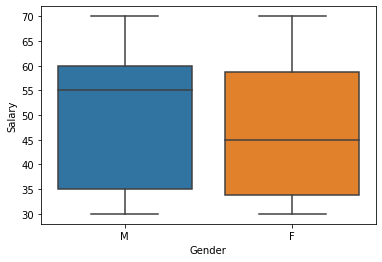

In [212]:
sns.boxplot(x = "Gender", y="Salary", data=employee)

In [219]:
np.quantile(employee.Salary, 0.25) 

35.0

In [220]:
np.quantile(employee.Salary, 0.75) 

60.0

#### Is the mean salary per gender different?

In [222]:
employee.groupby("Gender").agg({"Salary": "mean"}) 

# la media salarial por género es diferente

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [232]:
employee.agg({"Salary": ["mean", "max", "min"], "Years":["mean", "max", "min"] })

,Salary,Years
mean,48.888889,4.111111
max,70.000000,8.000000
min,30.000000,1.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [248]:
x = lambda y: max(y) -  min(y)

In [ ]:
df['CustomRating'] = df.apply(lambda x: custom_rating(x['Genre'],x['Rating']),axis=1)

In [260]:
employee.groupby("Department").apply(lambda y: max(y["Salary"])-min(y["Salary"]))

Department
HR       40
IT       40
Sales     0
dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [11]:
path = "Orders\\Orders.csv"

orders = link(path)

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [266]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [271]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [272]:
3.116174

3.116174

In [273]:
orders.UnitPrice.mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [274]:
orders.agg({"UnitPrice": ["max", "min"]})

,UnitPrice
max,8142.75
min,0.00


#### Select all the customers we have in Spain

In [376]:
orders[orders.Country == "Spain"].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [295]:
len(orders[orders.Country == "Spain"])

2485

#### Select all the customers who have bought more than 50 items ?

In [297]:
orders[orders.Quantity > 50].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that are above 50 items

In [341]:
orders[(orders.Country == "Spain") & (orders.Quantity > 50)].head(10)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


In [339]:
orders[(orders.Country == "Spain") & (orders.Quantity > 50)].head(10)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [375]:
orders[orders.UnitPrice == 0].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [307]:
x = orders.Description.str.find("lunch bag")

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [320]:
esp = orders[orders.Country == "Spain"]

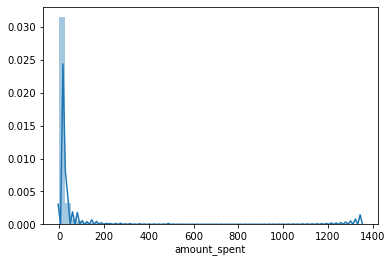

In [344]:
sns.distplot(esp["amount_spent"])
#podemos ver que la dsitribución se concentra en los primeros valores, por lo que voy a hacer otra gráfica limitando los
#valores del eje x para tener una imagen más clara

[(0.0, 200.0)]

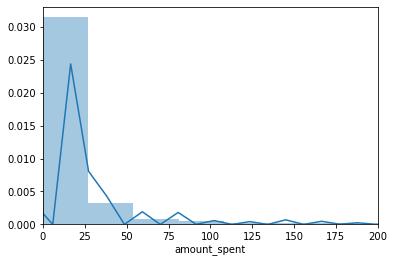

In [345]:
g = sns.distplot(esp["amount_spent"])
g.set(xlim=(0, 200))

#### Select all orders made in the month of August

In [374]:
orders[orders.month == 8].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [372]:
orders[orders.month == 8].groupby("Country").agg({"Quantity":"sum"}).head()

,Quantity
Country,
Australia,12570
Austria,790
Belgium,2069
Canada,52
Channel Islands,2009


#### What's the  average amount of money spent by country

In [373]:
orders.groupby("Country").apply(lambda y: sum(y["amount_spent"])/len(y)).head()

Country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Belgium       20.283772
Brazil        35.737500
dtype: float64

In [355]:
len(orders)

397924

#### What's the most expensive item?

In [367]:
orders.sort_values(by = "UnitPrice", ascending = False).max()

Unnamed: 0                                541908
InvoiceNo                                 581587
StockCode                                   POST
year                                        2011
month                                         12
day                                            7
hour                                          20
Description     zinc wire sweetheart letter tray
Quantity                                   80995
InvoiceDate                  2011-12-09 12:50:00
UnitPrice                                8142.75
CustomerID                                 18287
Country                              Unspecified
amount_spent                              168470
dtype: object

#### What was the average amount spent per year ?

In [369]:
orders.groupby("year").apply(lambda y: sum(y["amount_spent"])/len(y))

year
2010    21.892733
2011    22.430074
dtype: float64